In [1]:
import xarray as xr
from climtools import climtools_lib as ctl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cart = '/work/users/clima/fabiano/ece4/'
paleoaerfile = cart + 'Herold_etal_2014/herold_etal_eocene_CAM4_BAM_aerosols.nc'

In [3]:
aerfile_ifs_pd = cart + 'ifsdata/aerosol_cams_climatology_43R3a.nc'
aerfile_ifs_pi = cart + 'ifsdata/IFS_aerosol_climatology_PI.nc'

In [4]:
aer_paleo = xr.open_dataset(paleoaerfile)
aer_ifs_pd = xr.open_dataset(aerfile_ifs_pd)
aer_ifs_pi = xr.open_dataset(aerfile_ifs_pi)

In [ ]:
aer_paleo

<xarray.Dataset> Size: 225MB
Dimensions:    (lev: 26, ilev: 27, time: 12, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lev        (lev) float64 208B 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev       (ilev) float64 216B 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * time       (time) object 96B 0001-01-15 00:00:00 ... 0001-12-15 00:00:00
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnd
Data variables: (12/23)
    hyam       (lev) float64 208B ...
    hybm       (lev) float64 208B ...
    hyai       (ilev) float64 216B ...
    hybi       (ilev) float64 216B ...
    P0         float64 8B ...
    date       (time) int32 48B ...
    ...         ...
    PS         (time, lat, lon) float32 664kB ...
    SO4        (time, lev, lat, lon) float32 17MB ...
    SSLT01     (time, lev, lat, lon) float32 17MB ...
    SSLT02     (time, lev, lat, lon) float32 17MB ...
    SSLT03     (time, lev, lat, lon) float32 17MB ...
    SSLT04     (time, lev, lat, lon) float32 17MB ...
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      B.EO_3_C4f19g16_BAM192ptsAFR_conte_105
    title:                     UNSET
    logname:                   heroldn
    host:                      conte-a068.rcac.
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /group/huberm/data/inputdata/atm/cam/inic/fv/c...
    topography_file:           /home/heroldn/cesm/input_files/gx1vEO/cami_bnd...
    history:                   Wed Dec  4 10:47:41 2013: ncks --append -v dat...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

In [15]:
aer_ifs_pd

<xarray.Dataset> Size: 4MB
Dimensions:                     (lat: 61, lon: 120, month: 12)
Coordinates:
  * lat                         (lat) float32 244B 90.0 87.0 ... -87.0 -90.0
  * lon                         (lon) float32 480B 0.0 3.0 6.0 ... 354.0 357.0
Dimensions without coordinates: month
Data variables:
    Sulfates                    (month, lat, lon) float32 351kB ...
    Black_Carbon_hydrophilic    (month, lat, lon) float32 351kB ...
    Black_Carbon_hydrophobic    (month, lat, lon) float32 351kB ...
    Mineral_Dust_bin1           (month, lat, lon) float32 351kB ...
    Mineral_Dust_bin2           (month, lat, lon) float32 351kB ...
    Mineral_Dust_bin3           (month, lat, lon) float32 351kB ...
    Organic_Matter_hydrophilic  (month, lat, lon) float32 351kB ...
    Organic_Matter_hydrophobic  (month, lat, lon) float32 351kB ...
    Sea_Salt_bin1               (month, lat, lon) float32 351kB ...
    Sea_Salt_bin2               (month, lat, lon) float32 351kB ...
    Sea_Salt_bin3               (month, lat, lon) float32 351kB ...
Attributes:
    creation_date:  Sat 21 Jan 12:18:45 GMT 2017
    reference:      Reference for the CAMS-Interim reanalysis and the control...
    author:         ECMWF - Alessio Bozzo
    source:         2003-2011 Control run (gbst) scaled to CAMS interim reana...
    title:          Aerosol climatology derived from CAMS system
    history:        Mon Jan 23 20:18:26 2017: /usr/local/apps//nco/4.0.8/LP64...
    comment:        This file is the same as aerosol_cams_climatology_43R3.nc...

### Matching vars

In [7]:
ifs_vars = list(aer_ifs_pd.data_vars)
herold_vars = list(aer_paleo.data_vars)

In [16]:
ifs_vars

['Sulfates',
 'Black_Carbon_hydrophilic',
 'Black_Carbon_hydrophobic',
 'Mineral_Dust_bin1',
 'Mineral_Dust_bin2',
 'Mineral_Dust_bin3',
 'Organic_Matter_hydrophilic',
 'Organic_Matter_hydrophobic',
 'Sea_Salt_bin1',
 'Sea_Salt_bin2',
 'Sea_Salt_bin3']

In [10]:
herold_vars[9:]

['CB1',
 'CB2',
 'DST01',
 'DST02',
 'DST03',
 'DST04',
 'OC1',
 'OC2',
 'PS',
 'SO4',
 'SSLT01',
 'SSLT02',
 'SSLT03',
 'SSLT04']

In [19]:
var_dict = {
 'Sulfates': "SO4",
 'Black_Carbon_hydrophilic': "CB1",
 'Black_Carbon_hydrophobic': "CB2",
 'Mineral_Dust_bin1': "DST01",
 'Mineral_Dust_bin2': "DST02",
 'Mineral_Dust_bin3': "DST03",
 'Organic_Matter_hydrophilic': "OC1",
 'Organic_Matter_hydrophobic': "OC2",
 'Sea_Salt_bin1': "SSLT01",
 'Sea_Salt_bin2': "SSLT02",
 'Sea_Salt_bin3': "SSLT03"
}

### Change bins of Dust and Sea salt

- CAM4 bins: 0.1-1, 1-2.5, 2.5-5, 5-10
- IFS bins Dust: 0.03-0.55, 0.55-0.9, 0.9-20
- IFS bins Sea Salt: 0.03-0.5, 0.5-5, 5-20

In [11]:
aer_paleo_newbin = aer_paleo.copy()

In [13]:
aer_paleo_newbin['DST01'] = aer_paleo['DST01']/2.
aer_paleo_newbin['DST02'] = aer_paleo['DST01']/2.
aer_paleo_newbin['DST03'] = aer_paleo['DST02']+aer_paleo['DST03']+aer_paleo['DST04']

In [14]:
aer_paleo_newbin['SSLT01'] = aer_paleo['SSLT01']/2.
aer_paleo_newbin['SSLT02'] = aer_paleo['SSLT01']/2. + aer_paleo['SSLT02'] + aer_paleo['SSLT03']
aer_paleo_newbin['SSLT03'] = aer_paleo['SSLT04']

### Create ifs-like paleo file

In [21]:
# read U.S. standard atmosphere

# US Standard Atmosphere data from https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html
data = """
-1000   21.50   9.810   11.39   1.347   1.821
0       15.00   9.807   10.13   1.225   1.789
1000    8.50    9.804   8.988   1.112   1.758
2000    2.00    9.801   7.950   1.007   1.726
3000    -4.49   9.797   7.012   0.9093  1.694
4000    -10.98  9.794   6.166   0.8194  1.661
5000    -17.47  9.791   5.405   0.7364  1.628
6000    -23.96  9.788   4.722   0.6601  1.595
7000    -30.45  9.785   4.111   0.5900  1.561
8000    -36.94  9.782   3.565   0.5258  1.527
9000    -43.42  9.779   3.080   0.4671  1.493
10000   -49.90  9.776   2.650   0.4135  1.458
15000   -56.50  9.761   1.211   0.1948  1.422
20000   -56.50  9.745   0.5529  0.08891 1.422
25000   -51.60  9.730   0.2549  0.04008 1.448
30000   -46.64  9.715   0.1197  0.01841 1.475
40000   -22.80  9.684   0.0287  0.003996 1.601
50000   -2.5    9.654   0.007978 0.001027 1.704
60000   -26.13  9.624   0.002196 0.0003097 1.584
70000   -53.57  9.594   0.00052  0.00008283 1.438
80000   -74.51  9.564   0.00011  0.00001846 1.321
"""

# Parse the data
lines = data.strip().split('\n')
parsed_data = []
for line in lines:
    values = line.split()
    parsed_data.append([float(v) for v in values])

# Convert to numpy array
data_array = np.array(parsed_data)

# Extract columns
altitude = data_array[:, 0]      # m
temperature = 273.15 + data_array[:, 1]   # K
g = data_array[:, 2]            # m/s²
pressure = 1e2*data_array[:, 3]      # hPa
density = data_array[:, 4]       # kg/m³
mu = data_array[:, 5]           # dynamic viscosity (×10⁻⁵ Pa·s)

# Create xarray dataset
ds = xr.Dataset(
    {
        'temperature': (['altitude'], temperature, {
            'long_name': 'Temperature',
            'units': 'degrees_Kelvin',
            'description': 'Air temperature'
        }),
        'gravity': (['altitude'], g, {
            'long_name': 'Gravitational acceleration',
            'units': 'm/s2',
            'description': 'Acceleration due to gravity'
        }),
        'pressure': (['altitude'], pressure, {
            'long_name': 'Pressure',
            'units': 'hPa',
            'description': 'Atmospheric pressure'
        }),
        'density': (['altitude'], density, {
            'long_name': 'Density',
            'units': 'kg/m3',
            'description': 'Air density'
        }),
        'viscosity': (['altitude'], mu, {
            'long_name': 'Dynamic viscosity',
            'units': '1e-5 Pa*s',
            'description': 'Dynamic viscosity (×10⁻⁵ Pa·s)'
        })
    },
    coords={
        'altitude': (['altitude'], altitude, {
            'long_name': 'Altitude',
            'units': 'm',
            'description': 'Geometric altitude above sea level'
        })
    },
    attrs={
        'title': 'U.S. Standard Atmosphere 1976',
        'description': 'Atmospheric properties as a function of altitude',
        'source': 'U.S. Standard Atmosphere 1976',
        'reference': 'NOAA-S/T 76-1562'
    }
)

ds.to_netcdf(cart + 'us_standard_atmosphere.nc')

In [22]:
# Create log pressure coordinate
log_pressure = np.log(ds.pressure)
new_log_pressure = np.log(aer_paleo.lev)

# Add log_pressure as a coordinate
ds_with_logp = ds.assign_coords(log_pressure= log_pressure)

ds_new = ds_with_logp.swap_dims({'altitude': 'log_pressure'})

# Interpolate using xarray's interp method
ds_interp = ds_new.interp(log_pressure=new_log_pressure, method='linear')

# # Add the new pressure levels as coordinate
# ds_interp = ds_interp.assign_coords(pressure=aer_paleo.lev)

In [23]:
ds_interp.to_netcdf(cart + 'us_standard_atmosphere_newlevs.nc')

### Convert Herold in IFS format:

- convert concentrations (kg/kg) to density (kg/m3)
- integrate vertically
- regrid horizontally
- assign var in new ds

In [25]:
aer_ifs_paleo = aer_ifs_pd.copy()

In [ ]:
## to do for each var
for varname2 in var_dict: # IFS name
    varname1 = var_dict[varname2] # herold name

    print(f'{varname1} -> {varname2}')

    new_var = aer_paleo[varname1]*ds_interp.density
    new_var_rg = ctl.regrid_dataset(new_var, regrid_to_reference = aer_ifs_paleo[varname2])
    new_var_rg_int = -new_var_rg.integrate(coord = 'altitude') # the vertical axis is reversed
    aer_ifs_paleo[varname2].data = new_var_rg_int.data.astype('float32')


SO4 -> Sulfates
Regridding...
Regridding completed in 0:00:00.764537
CB1 -> Black_Carbon_hydrophilic
Regridding...
Regridding completed in 0:00:00.221880
CB2 -> Black_Carbon_hydrophobic
Regridding...
Regridding completed in 0:00:00.239437
DST01 -> Mineral_Dust_bin1
Regridding...
Regridding completed in 0:00:00.221238
DST02 -> Mineral_Dust_bin2
Regridding...
Regridding completed in 0:00:00.215834
DST03 -> Mineral_Dust_bin3
Regridding...
Regridding completed in 0:00:00.214685
OC1 -> Organic_Matter_hydrophilic
Regridding...
Regridding completed in 0:00:00.241673
OC2 -> Organic_Matter_hydrophobic
Regridding...
Regridding completed in 0:00:00.220419
SSLT01 -> Sea_Salt_bin1
Regridding...
Regridding completed in 0:00:00.218864
SSLT02 -> Sea_Salt_bin2
Regridding...
Regridding completed in 0:00:00.217272
SSLT03 -> Sea_Salt_bin3
Regridding...
Regridding completed in 0:00:00.218828


### Sanity check

In [31]:
for var in var_dict: 
    print(f'{var} -> PI clim: {aer_ifs_pi[var].min().values:6.2e} - {aer_ifs_pi[var].max().values:6.2e}      PALEO: {aer_ifs_paleo[var].min().values:6.2e} - {aer_ifs_paleo[var].max().values:6.2e}')

Sulfates -> PI clim: 6.25e-08 - 8.27e-06      PALEO: 1.21e-07 - 3.97e-06
Black_Carbon_hydrophilic -> PI clim: 3.32e-09 - 4.97e-06      PALEO: 2.26e-14 - 4.90e-07
Black_Carbon_hydrophobic -> PI clim: 1.01e-12 - 3.03e-06      PALEO: 8.48e-10 - 1.38e-06
Mineral_Dust_bin1 -> PI clim: 1.71e-07 - 1.83e-04      PALEO: 9.74e-09 - 1.74e-04
Mineral_Dust_bin2 -> PI clim: 3.95e-08 - 6.22e-04      PALEO: 1.17e-08 - 4.88e-04
Mineral_Dust_bin3 -> PI clim: 1.95e-08 - 7.50e-04      PALEO: 5.88e-09 - 4.96e-04
Organic_Matter_hydrophilic -> PI clim: 2.99e-08 - 5.83e-05      PALEO: 1.70e-13 - 3.94e-06
Organic_Matter_hydrophobic -> PI clim: 1.26e-10 - 2.03e-05      PALEO: 6.93e-09 - 1.07e-05
Sea_Salt_bin1 -> PI clim: 4.14e-08 - 8.07e-06      PALEO: 8.81e-08 - 4.66e-06
Sea_Salt_bin2 -> PI clim: 1.63e-07 - 3.81e-04      PALEO: 5.61e-07 - 3.71e-05
Sea_Salt_bin3 -> PI clim: 1.67e-07 - 4.62e-04      PALEO: 1.83e-07 - 4.49e-05


Adding cyclic point



<GeoAxes: >

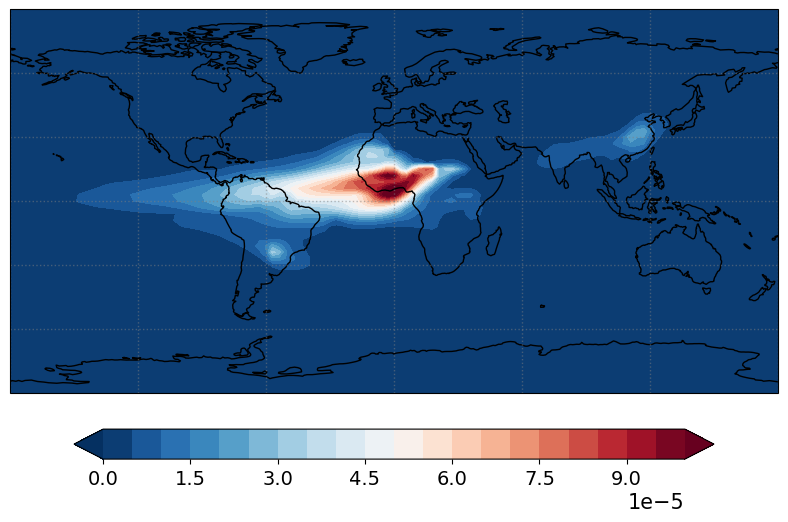

In [35]:
ctl.plot_map_contour(aer_ifs_paleo['Mineral_Dust_bin1'][0], cbar_range=(0, 1e-4))

Adding cyclic point



<GeoAxes: >

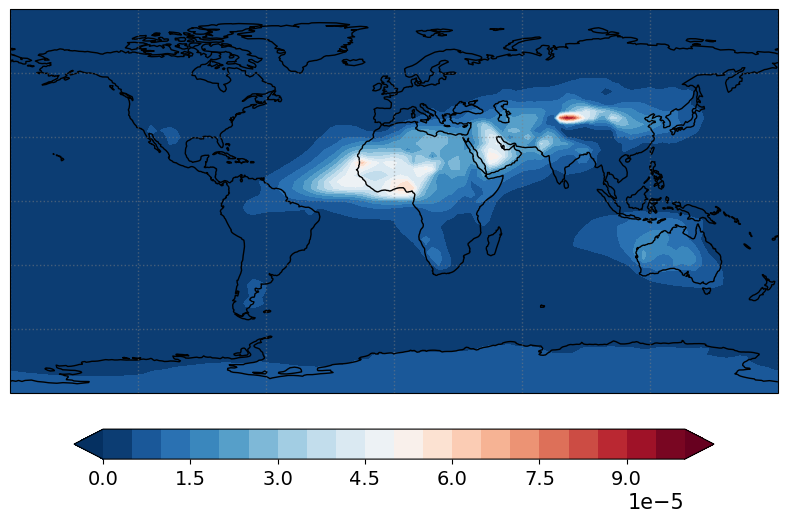

In [37]:
ctl.plot_map_contour(aer_ifs_pi['Mineral_Dust_bin1'][0], cbar_range=(0, 1e-4))